## Opción 1 Low-Code: Visualizando el Aprendizaje de una CNN con MNIST

### 🎯 Objetivo

Entrenar una red neuronal convolucional (CNN) para clasificar imágenes de dígitos escritos a mano (MNIST), y visualizar qué características aprende cada capa. Al final, se evaluará el modelo con una matriz de confusión y un reporte de clasificación.

## 📦 Parte 1: Definición y entrenamiento del modelo

In [2]:
# === Setup MNIST y datos para la CNN ===
from tensorflow.keras.datasets import mnist
import numpy as np

# Dimensiones de imagen y número de clases
alto, ancho = 28, 28    # 👈 MNIST son imágenes 28x28 en escala de grises
clases = 10             # 👈 Dígitos 0-9

# Cargar dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Escalar a [0,1] y añadir el canal (1) para escala de grises
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = np.expand_dims(x_train, axis=-1)   # -> (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=-1)    # -> (10000, 28, 28, 1)

# Asegurar que las etiquetas son enteros (para sparse_categorical_crossentropy)
y_train = y_train.astype("int32")
y_test  = y_test.astype("int32")

# Sanity check rápido (opcional, pero útil)
print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test :", x_test.shape,  "y_test :", y_test.shape)


x_train: (60000, 28, 28, 1) y_train: (60000,)
x_test : (10000, 28, 28, 1) y_test : (10000,)


In [3]:
from tensorflow.keras import Input, Model
from tensorflow.keras import layers

# Definir la entrada de la red (una imagen de 28x28 en escala de grises)
inputs = Input(shape=(alto, ancho, 1))   # 👈 CAMBIA AQUÍ alto, ancho, de la imagen

# Primer bloque convolucional: detecta bordes y patrones simples
x = layers.Conv2D(8, (3, 3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2, 2))(x)  # Reduce la dimensión y conserva lo más relevante

# Segundo bloque convolucional: detecta combinaciones más complejas (curvas, esquinas)
x = layers.Conv2D(16, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Capa densa para clasificación final
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(clases, activation='softmax')(x)  # 👈 CAMBIA AQUÍ a 10, clases posibles (0-9)

# Compilar el modelo
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
print(model.summary())

# Entrenar el modelo por 5 épocas
model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9378 - loss: 0.2091 - val_accuracy: 0.9780 - val_loss: 0.0760
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0742 - val_accuracy: 0.9805 - val_loss: 0.0650
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0536 - val_accuracy: 0.9853 - val_loss: 0.0493
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0354 - val_accuracy: 0.9888 - val_loss: 0.0410


### 🧠 Preguntas para reflexionar (Parte 1)

**1. ¿Por qué usamos una entrada de tamaño `(28, 28, 1)`? ¿Qué representa cada dimensión?**  
Porque las imágenes del dataset MNIST tienen **28 píxeles de alto por 28 de ancho**, y solo **un canal**, ya que son **en escala de grises**.  
Es decir, no hay tres canales como en una imagen RGB, sino uno solo que representa la intensidad del color (del negro al blanco).


**2. En la primera capa convolucional usamos 8 filtros de tamaño 3×3. ¿Qué significan estos filtros?**  
Cada filtro de 3×3 es como una “ventana” que recorre la imagen buscando **patrones específicos**, por ejemplo bordes, líneas o trazos.  
Los 8 filtros significan que la red aprende **8 formas distintas de ver la imagen**, cada una enfocándose en un tipo diferente de patrón visual.


**3. ¿Qué efecto tiene `MaxPooling2D` sobre la salida de la convolución?**  
El *MaxPooling* **reduce el tamaño** de la imagen, quedándose solo con los valores más importantes (los más altos).  
Esto ayuda a que la red sea **más eficiente**, **menos sensible a pequeñas variaciones** y a que se concentre en lo esencial del dígito sin perder información clave.


**4. ¿Por qué la última capa tiene 10 neuronas y qué significa la función `softmax` en este contexto?**  
Porque hay **10 posibles clases** en MNIST, una por cada dígito del 0 al 9.  
La función *softmax* transforma la salida de la red en **probabilidades**:  
cada neurona representa la confianza del modelo en que la imagen pertenece a ese dígito.  
La clase con la probabilidad más alta es la predicción final.


**5. Observa el `model.summary()` y explica:**

- **¿Cómo cambia el tamaño del tensor a lo largo de las capas?**  
  Empieza en `28×28×1` (imagen original) y va reduciéndose con cada convolución y *pooling* hasta llegar a un tamaño mucho menor,  
  mientras la profundidad (cantidad de filtros) aumenta.

- **¿Por qué disminuyen las dimensiones espaciales?**  
  Porque en cada paso se aplica *conv* y *pooling*, que recortan y resumen la información espacial  
  para que el modelo se enfoque en las características más representativas.

- **¿Por qué aumenta el número de filtros?**  
  Porque las capas más profundas aprenden **características más complejas**.  
  Las primeras detectan bordes simples; las siguientes combinan esos trazos para entender curvas o partes completas del dígito.

  

## 🔍 Parte 2: Visualización de mapas de activación

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


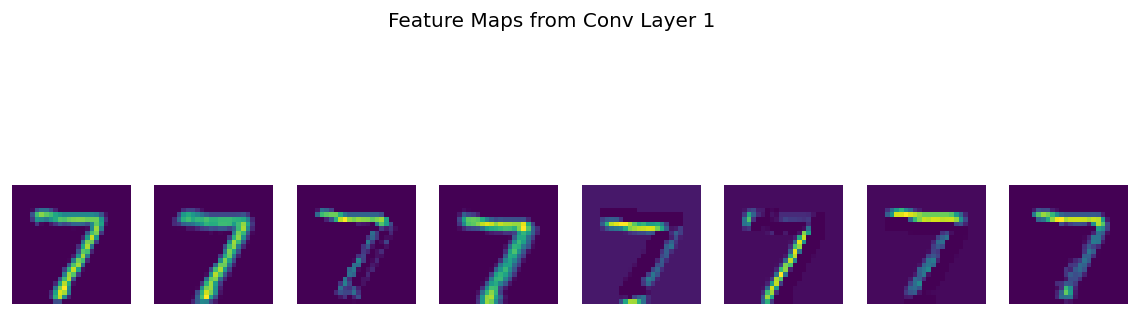

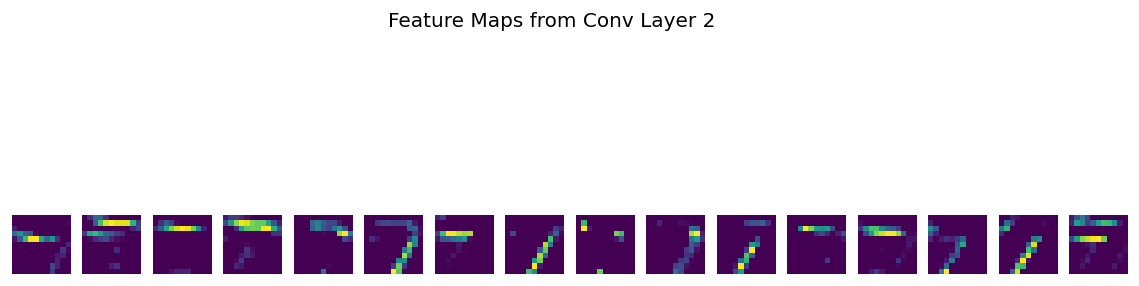

In [4]:
# Seleccionar una imagen del conjunto de prueba
img = x_test[0:1]

# Crear un modelo que devuelva las salidas intermedias de las capas convolucionales
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
feature_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Obtener los mapas de características
feature_maps = feature_model.predict(img)

# Visualizar los mapas de cada capa
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120  # 👈 mejora la resolución de los gráficos

for i, fmap in enumerate(feature_maps):
    num_filters = fmap.shape[-1]
    plt.figure(figsize=(12, 4))
    for j in range(num_filters):
        plt.subplot(1, num_filters, j + 1)
        plt.imshow(fmap[0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature Maps from Conv Layer {i+1}")
    plt.show()

### 🧠 Pregunta (Parte 2)

**1. ¿La primera capa detecta bordes o contornos?**  
Sí. En la primera capa se puede ver que los filtros responden a **bordes y trazos básicos** del número.  
Algunos resaltan la línea diagonal del 7, otros la barra superior, y en general muestran cómo la red empieza detectando **formas simples y locales**.


**2. ¿La segunda capa comienza a detectar formas más complejas como bucles o esquinas?**  
Exactamente. En la segunda capa las activaciones se vuelven más específicas y pequeñas.  
La red combina los bordes detectados antes para **identificar estructuras más complejas**, como esquinas o uniones de líneas, que ayudan a distinguir el 7 de otros dígitos similares.


**3. ¿Qué tanto se reduce la imagen con las capas de MaxPooling?**  
Cada capa de *pooling* reduce aproximadamente a la mitad las dimensiones espaciales.  
En este modelo, el tamaño pasa de **28×28 → 13×13 → 5×5**, por lo que al final se conserva solo una **fracción del tamaño original**,  
manteniendo la información más relevante y descartando detalles redundantes.



## 📊 Parte 3: Evaluación del modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


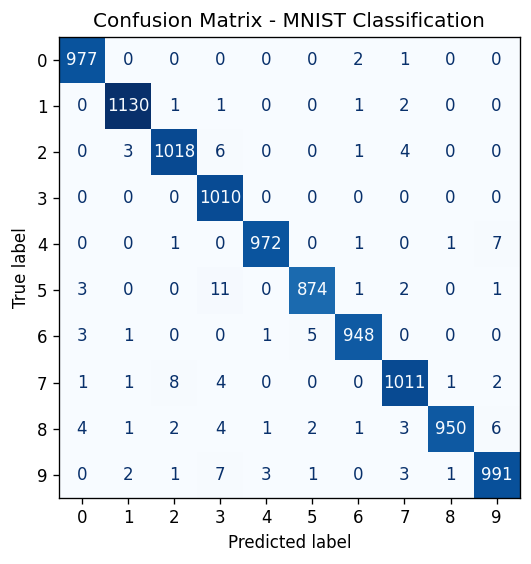

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [7]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

# Predecir clases
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir probabilidades en etiquetas

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    cmap='Blues',
    colorbar=False,
    display_labels=np.arange(10)
)
plt.title("Confusion Matrix - MNIST Classification")
plt.grid(False)
plt.tight_layout()
plt.show()

# Reporte de métricas por clase
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

### 🧠 Preguntas (Parte 3)

**1. ¿Qué dígitos fueron más fáciles de clasificar?**  
Los dígitos **0, 1, 2, 3, 4, 6 y 9** fueron los más fáciles de clasificar.  
Se nota que la red casi no cometió errores en ellos: todos tienen una *recall* y *precision* cercanas al 100%.  
Son números con formas muy definidas, por eso los filtros convolucionales logran distinguirlos con claridad.


**2. ¿Dónde se cometieron más errores? ¿En qué clases?**  
Los errores se concentraron en casos donde los dígitos son **visualmente parecidos o mal escritos**:  
- Algunos **5** fueron confundidos con **3** o **6**,  
- Algunos **7** con **2**,  
- Y pequeños deslices entre **8 ↔ 9**.  

En general, la matriz de confusión muestra pocas desviaciones fuera de la diagonal, lo que indica que la red aprendió patrones muy consistentes.


**3. ¿Qué métrica destacarías en el reporte (*precision*, *recall*, *f1-score*) y por qué?**  
Destacaría el **F1-score**, porque combina *precision* y *recall* en una sola medida equilibrada.  
En este caso, el modelo mantiene un F1-score promedio de **0.99**, lo que refleja no solo que acierta casi siempre,  
sino que además **detecta correctamente todas las clases sin sesgo** hacia alguna en particular.


**📈 Conclusión general:**  
El modelo CNN logró una **exactitud del 99%**, con errores mínimos y comportamiento estable entre clases.  
Esto confirma que la arquitectura fue suficiente para aprender las características visuales del conjunto MNIST sin sobreajustarse.
